# Take-home exam 2d-visualization MVE080/MMG640

This notebook contains the questions for the take-home exam in the course Scientific visualization Autumn MVE080/MMG640. Provide the answers in the notebook and then upload the notebook as a html on Canvas.

**Important** - make sure to hand in the exam in time. You will have 24 hours (00:00-23:59) on 13-12-2023 to complete the exam. Late submissions will not be accepted. 

**Important** - you are not allowed to collaborate or do plagiarism by using available text/code on the internet. In case we detect plagiarism you will receive a failing grade.

**Important** - make sure that you complete and provide an answer to all the questions on the exam. In every code cell and cell on the format; *Provide answer here*, you should provide an answer. 

**Important** - it is not allowed to use Chat-GTP or any other large language model to directly answer any of the questions. Large language models can be excellent tools, e.g. for editing text (which you are allowed to do), but using them to directly answer a question is bad practice as these models are often incorrect. Any direct usage of Chat-GTP to answer questions will be considered cheating and reported. 


## Grading criteria

The grade on this take-home exam is either pass or fail. To pass you need 11 out of 16 points. When correcting the exam I will look for the following things:

1. That the produced visual is readable. 
2. That given the task the visual effectively communicates the intended main message. 
3. That any potential motivations to why a visual is readable or not is correct. 
4. That appropriate colors have been used.

## Other information

You are allowed to use either R or Python to answer the questions below (both have notebook support). You are further allowed to use any plotting library you want. The code-snippet below loads the packages we primarily have used throughout the course.


In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
# Currently in a plotine dependancy they have deprication warning, so 
# we mute warnings to have a better experience
import warnings
warnings.filterwarnings("ignore")

## Question 1 (3 points)

During the course we have talked about colormaps for categorical and quantitative data. One type of colormap we have covered is quantitative/sequential colormap (for example see [here](https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=9) and [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html)). Below answer the following **three** questions:

1. Explain when it is suitable to use a quantitative colormap (1p).
2. Create a visual below where it is suitable to use a quantitative colormap. You are allowed to reuse any visual you have created in the homework, or to create a new visual using any of the datasets available on Canvas. **You are not allowed to use any of the visuals from the lecture slides** (1p). 
3. Motivate which message a quantitative colormap helps to highlight in the created visual (1p). 


Based on the function. color maps are split into different categories,Sequencial colormap is one among them and it is used for representing information that has ordering.It is used when we represent data that has a numerical or quantitative range. They are suitable  for representing ranges of numbers ,for example income, temperature,count  , age etc.The main characteristic of sequential colormaps is that they progress smoothly from one color to another, usually in a single direction from low to high. This progression helps  viewers to interpret and understand variations in the dataset at a glance . 

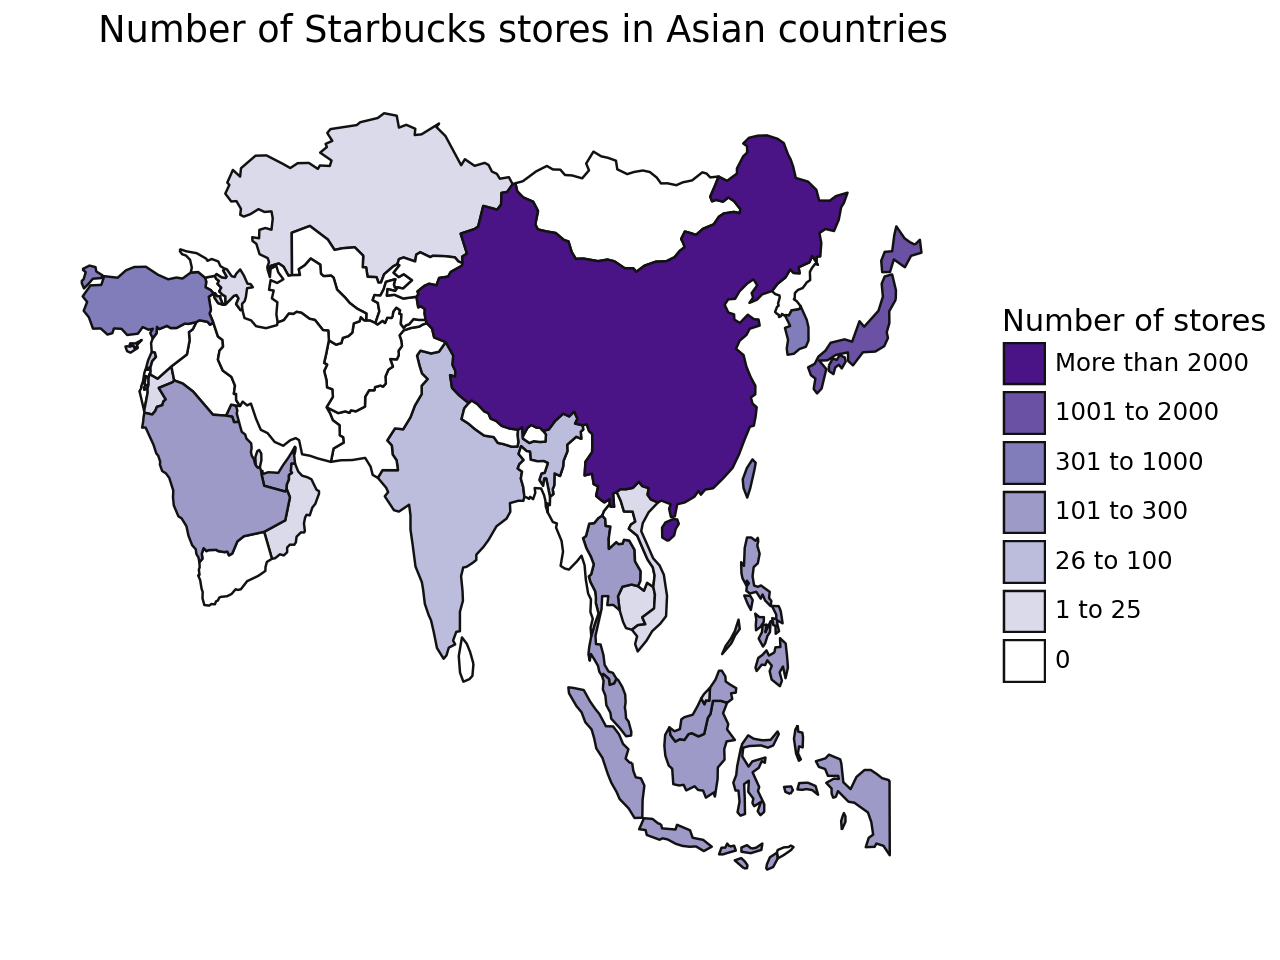

<Figure Size: (640 x 480)>

In [38]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
asia = world[world["continent"] == "Asia"] 

starbucks_stores = pd.read_csv('Starbucks_data-1.csv')


starbucks_asia = asia.merge(starbucks_stores, left_on="iso_a3", right_on="iso_a3")


all_iso_a3_asia = asia['iso_a3'].unique() 

all_iso_a3_asia_dataframe = pd.DataFrame({"iso_a3": all_iso_a3_asia})

starbucks_asia_count = starbucks_asia.copy() 

starbucks_asia_count = starbucks_asia.groupby("iso_a3").count()[["Store Name"]].rename(columns={"Store Name":"Count"})
starbucks_asia_count = starbucks_asia_count.reset_index()


starbucks_all_asia_counts = pd.merge(all_iso_a3_asia_dataframe, starbucks_asia_count, how="left", on="iso_a3")

starbucks_all_asia_counts["Count"].fillna(0, inplace=True) 



starbucks = pd.merge(asia, starbucks_all_asia_counts, on="iso_a3", how="left")







col_use = ['#ffffff', "#dadaeb", "#bcbddc", "#9e9ac8", "#807dba", "#6a51a3", "#4a1486"]

starbucks["Count"] = starbucks["Count"].fillna(0)


quantile_val = np.quantile(starbucks["Count"], [0.5, 0.7, 0.7578, 0.893, 0.9572, 0.98935])


conditions = [
    (starbucks["Count"] == 0),
    (starbucks["Count"].ge(quantile_val[0]) & starbucks["Count"].lt(quantile_val[1])),
    (starbucks["Count"].ge(quantile_val[1]) & starbucks["Count"].lt(quantile_val[2])),
    (starbucks["Count"].ge(quantile_val[2]) & starbucks["Count"].lt(quantile_val[3])),
    (starbucks["Count"].ge(quantile_val[3]) & starbucks["Count"].lt(quantile_val[4])),
    (starbucks["Count"].ge(quantile_val[4]) & starbucks["Count"].lt(quantile_val[5])),
    starbucks["Count"].ge(quantile_val[5])
]

choices = [
    "0",
    f"{int(quantile_val[0]) + 1} to {int(quantile_val[1])}",
    f"{int(quantile_val[1]) + 1} to {int(quantile_val[2])}",
    f"{int(quantile_val[2]) + 1} to {int(quantile_val[3])}",
    f"{int(quantile_val[3]) + 1} to {int(quantile_val[4])}",
    f"{int(quantile_val[4]) + 1} to {int(quantile_val[5])}",
    f"More than {int(quantile_val[5])}"
]


starbucks["N_count"] = pd.Categorical(np.select(conditions, choices), categories=choices[::-1])

p2 = (ggplot(starbucks)
    + geom_map(aes(fill="N_count"))
    + scale_fill_manual(values=col_use[::-1], name = "Number of stores")
    + labs(title = "     Number of Starbucks stores in Asian countries")
    + theme(panel_background=element_rect(fill = "white"),
            axis_ticks=element_blank(),
            axis_text=element_blank()))
p2

The visualization is about the number of Starbucks stores in different Asian countries.Here I have used sequencial colormap of purple It progress from white to dark purple.It is clear from the visualization China has great number of starbucks stores compared to other asian countries.Also we can easily identify the countries with no Starbucks stores.

## Question 2 (2 points)

Below, a made-up example on proportion data showing book genre people prefer for the years 1990, 2000, and 2010 is given. Data are plotted as pie-charts. Answer the following **two** questions: 

1. Motivate why a pie-chart is ill-suited if we want to see how the proportion that prefer a certain genre, e.g. horror, has changed over time (1p).
2. Create a visual from where it is easy to see how the proportion that prefer **Romance** has changed over the years - you should include all genre and all years in the visual but put extra focus on **Romance** (1p). 

In [39]:
import matplotlib.pyplot as plt

data_1990 = pd.DataFrame({"Genre" : ["Fantasy", "Horror", "Crime", "Romance", "Other"],
                          "Proportion" : [10, 15, 30, 25, 20],
                          "Year" : [1990, 1990, 1990, 1990, 1990], 
                          "Color" : ["#E8112d", "#DA291C", "#83CF39", "#009933", "#006AB3"]})
data_2000 = pd.DataFrame({"Genre" : ["Fantasy", "Horror", "Crime", "Romance", "Other"],
                          "Proportion" : [16, 9, 35, 20, 20],
                          "Year" : [2000, 2000, 2000, 2000, 2000], 
                          "Color" : ["#E8112d", "#DA291C", "#83CF39", "#009933", "#006AB3"]})                                 
data_2010 = pd.DataFrame({"Genre" : ["Fantasy", "Horror", "Crime", "Romance", "Other"],
                          "Proportion" : [25, 12, 27, 12, 24],
                          "Year" : [2010, 2010, 2010, 2010, 2010], 
                          "Color" : ["#E8112d", "#DA291C", "#83CF39", "#009933", "#006AB3"]})                                                    



fig, axs = plt.subplots(1, 3, constrained_layout=True, dpi=300, figsize=(18, 10))

axs[0].pie(data_1990["Proportion"], 
        labels=data_1990["Genre"], 
        colors = data_1990["Color"], 
        autopct='%1.1f%%',
        startangle=90.0)
axs[0].set_title("1990")

axs[1].pie(data_2000["Proportion"], 
        labels=data_2000["Genre"], 
        colors = data_2000["Color"], 
        autopct='%1.1f%%',
        startangle=90.0)
axs[1].set_title("2000")

axs[2].pie(data_2010["Proportion"], 
        labels=data_2010["Genre"], 
        colors = data_2010["Color"], 
        autopct='%1.1f%%',
        startangle=90.0)
axs[2].set_title("2010")

plt.show()


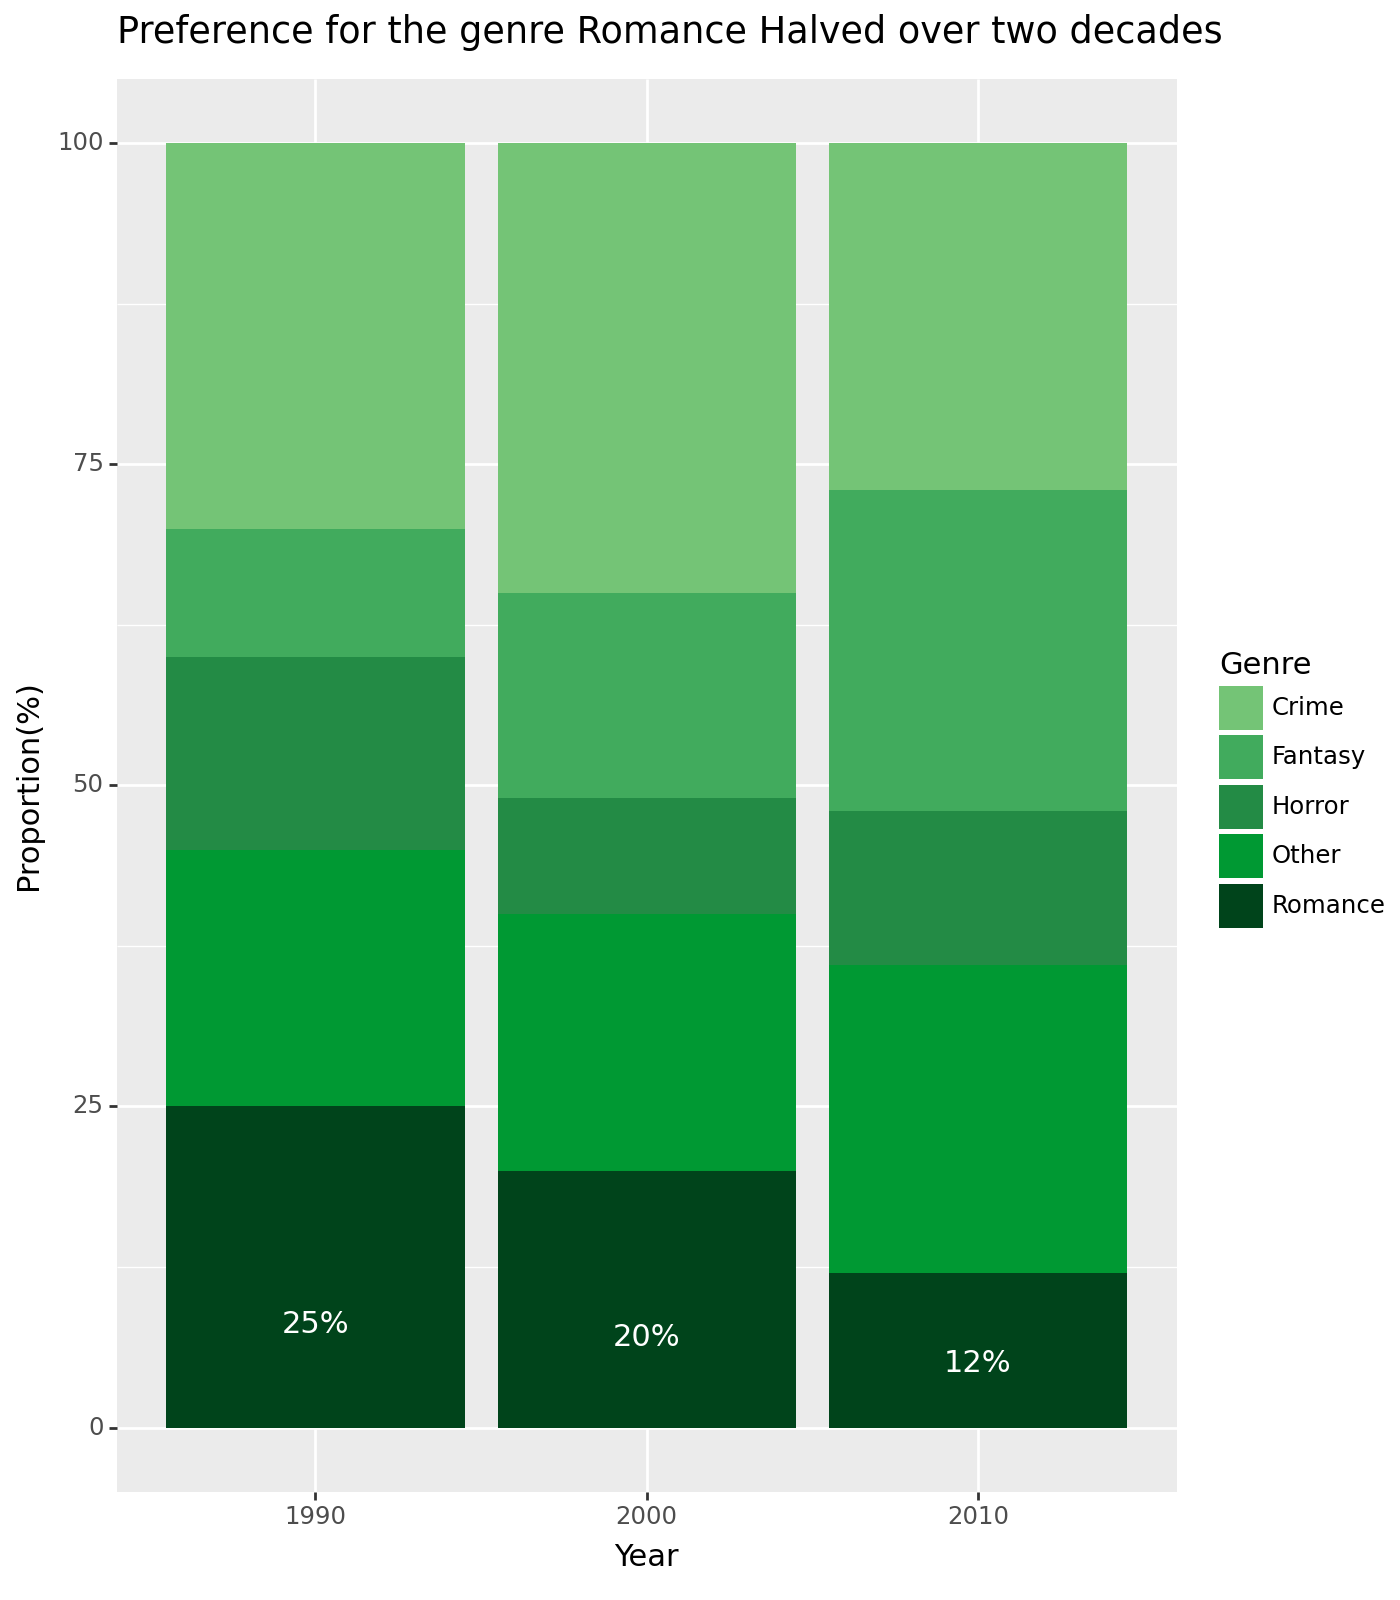

In [86]:

from plotnine import ggplot, aes, geom_bar, coord_flip, theme, scale_fill_manual

data_1990 = pd.DataFrame({"Genre": ["Fantasy", "Horror", "Crime", "Romance", "Other"],
                          "Proportion": [10, 15, 30, 25, 20],
                          "Year": [1990, 1990, 1990, 1990, 1990],
                          "Color": ["#74c476", "#41ab5d", "#238b45", "#009933", "#00441b"]})
data_2000 = pd.DataFrame({"Genre": ["Fantasy", "Horror", "Crime", "Romance", "Other"],
                          "Proportion": [16, 9, 35, 20, 20],
                          "Year": [2000, 2000, 2000, 2000, 2000],
                          "Color": ["#E8112d", "#DA291C", "#83CF39", "#009933", "#006AB3"]})
data_2010 = pd.DataFrame({"Genre": ["Fantasy", "Horror", "Crime", "Romance", "Other"],
                          "Proportion": [25, 12, 27, 12, 24],
                          "Year": [2010, 2010, 2010, 2010, 2010],
                          "Color": ["#E8112d", "#DA291C", "#83CF39", "#009933", "#006AB3"]})

data_combined = pd.concat([data_1990, data_2000, data_2010])

p = (ggplot(data_combined, aes(x='factor(Year)', y='Proportion', fill='Genre')) +
     geom_bar(stat='identity', position='stack') +
     theme(figure_size=(7, 8)) +
      labs(x="Year", y="Proportion(%)", title="Preference for the genre Romance Halved over two decades") +     
     scale_fill_manual(values=data_combined['Color'].tolist())
     + annotate("text", x=1, y=8, label="25%", color="white")
    + annotate("text", x=2, y=7, label="20%", color="white")
    + annotate("text", x=3, y=5, label="12%", color="white")
     )

print(p)


Even though pie charts are good for showing proportions, they're not the best for analysing the trends over the years.In this context,  if you look at the horror genre, it's clear it changes over time in the data. But with pie charts, it's hard to see this at a glance because people aren't great at judging amounts by looking at angles.And labeling all the informations in pie chart makes it crowded and it leads to bad visualization.Colour theme used in pie chart is bad because it is hard to identify between the genre horror and fantasy also it is not color blindness friendly

## Question 3 (1 point)

On Canvas two different ways to plot the uncertainty for a point estimate are given. Which visual would you use for a lay audience (that is an audience not trained in statistics). Motivate!


For people not familiar with statistics, terms like 'confidence interval' and 'standard error' can be hard to grasp. So, using confidence strips (Fig 2) is likely better than error bars with caps (Fig 1) for this kind of audience. Confidence strips are simpler , it is like coloring a band around each bar to show uncertainty. Graded error bars, with changing widths, might be a bit more confusing and need extra explanation.In the given visualization to know which country have best chocolate rating confidence strip is the way of visualiztion it shows the mean ratimg  marked as a dark band and the spread of rating points .For a person to decide from where to buy chocolates this visualiztion is enough .

## Question 4 (2 points)

On Canvas you have a facet plot showing forest coverage for various countries from 1990 to 2019. Answer the following **two** questions:

1. Using the dataset on Canvas recreate the visual, but, with better suited colors (1p). 
2. Motivate why your new colors are an appropriate choice for this visual (1p).


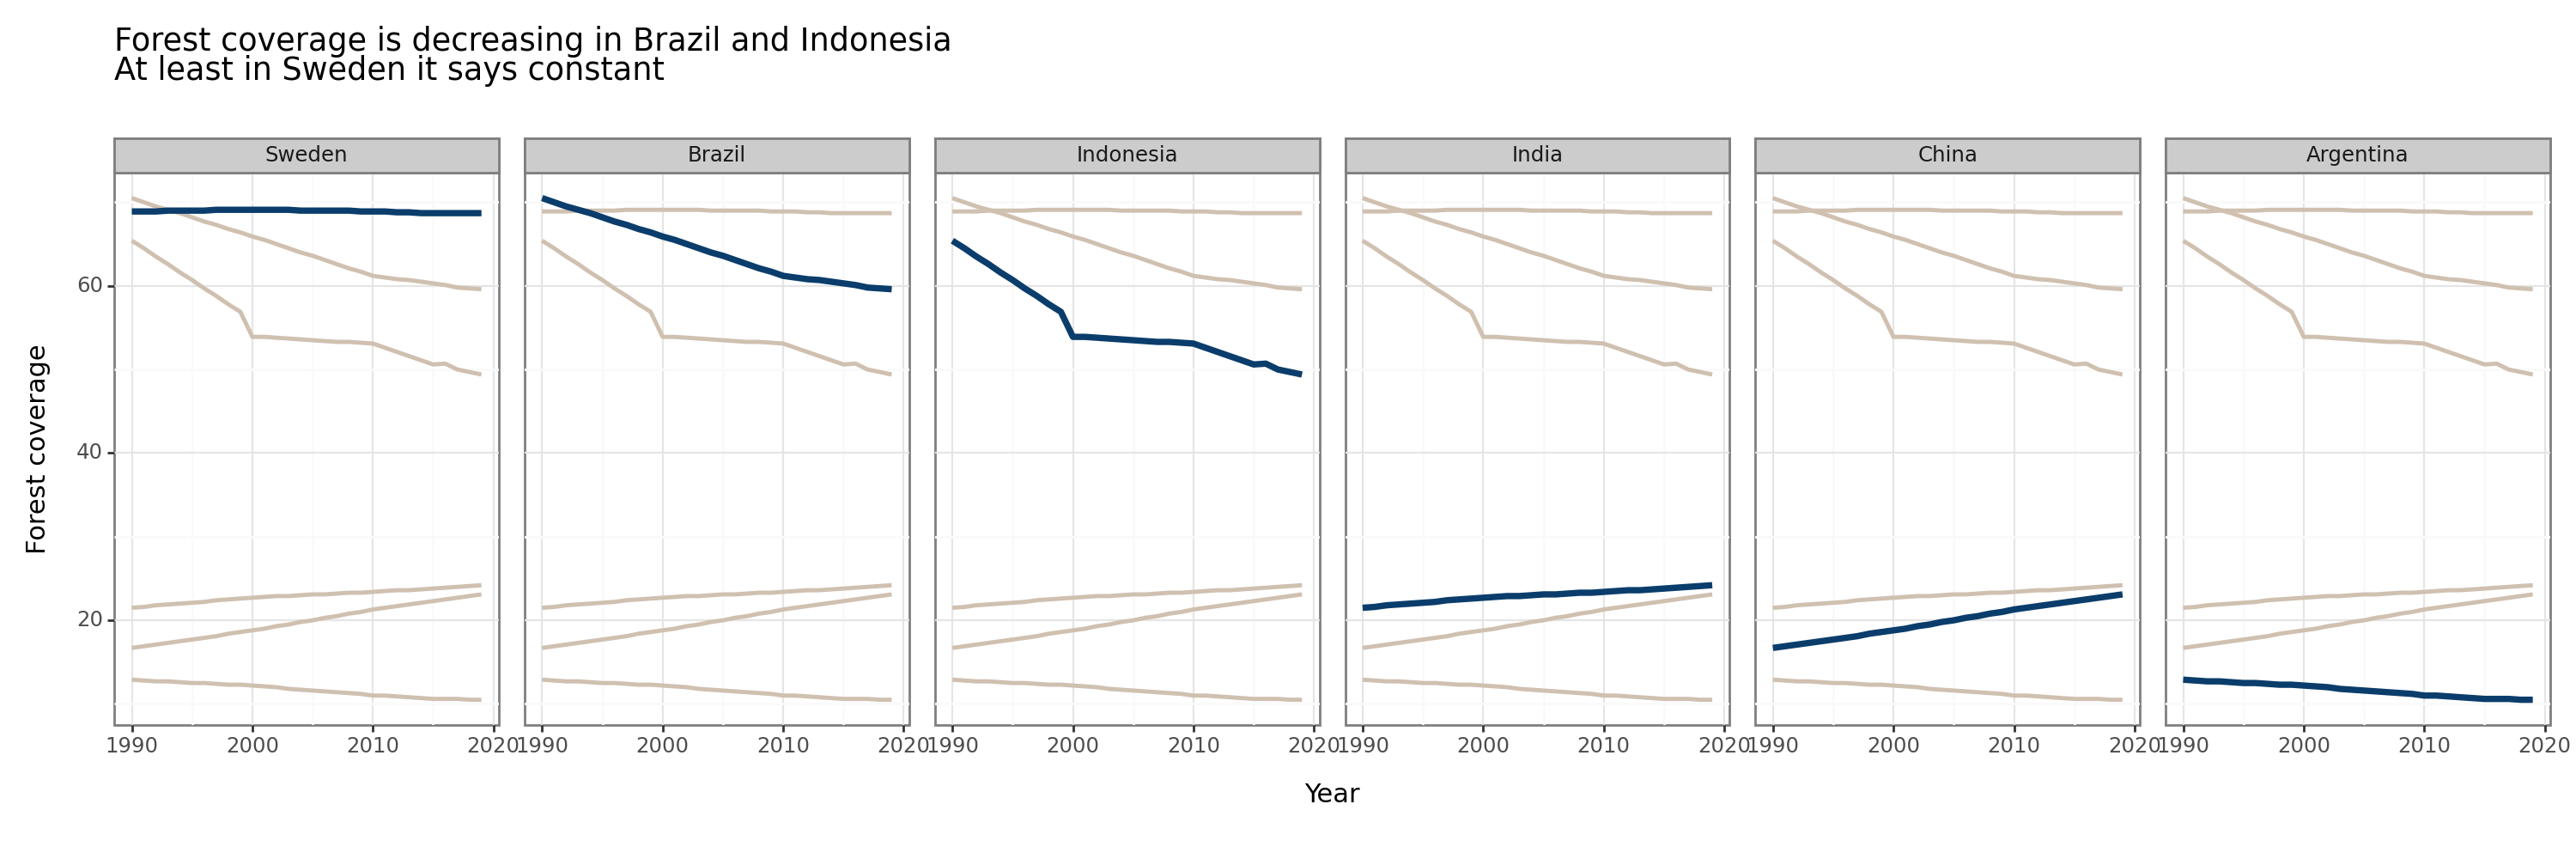

<Figure Size: (1500 x 500)>

In [41]:
data_forest=pd.read_csv('Forest_tidy-4.csv')
data_forest = data_forest.assign(country=pd.Categorical(data_forest["country"],
                                                       categories= ["Sweden", "Brazil", "Indonesia", "India", "China", "Argentina"]))

countries_to_keep = ["Sweden", "Brazil", "Indonesia", "India", "China", "Argentina"]
mask = data_forest['country'].isin(countries_to_keep)
filtered_data = data_forest[mask]

df2 = filtered_data.copy() 
df2["country_copy"] = df2["country"]
df2 = df2.drop("country", axis=1)

col_highlight = ["#D0C0B0", "#0A3D6B", "#ECE9CD", "#0D5C3D", "#812F02"]
p = (ggplot(filtered_data, aes("Year", "Forest_coverage"))
    + geom_line(data=df2, mapping=aes(x="Year", y="Forest_coverage", group="country_copy"), size=01.0, color=col_highlight[0])
    + geom_line(aes(group="country"), size=1.5, color=col_highlight[1])
    + facet_wrap("~country", nrow=1)
    + labs(x = "Year", y = "Forest coverage", title = "Forest coverage is decreasing in Brazil and Indonesia \nAt least in Sweden it says constant")
    + theme_bw()
    + theme(figure_size=(15, 5)))
p

Instead of playing with lot of colours I stick on to two colours dark blue and light gray.Using only dark blue and light gray in our graph helps viewers focus on the forest coverage changes from 1990 to 2019. With a facet plot for each country, we highlight one at a time, making it easy to compare and understand trends without getting distracted by different colors. Our goal is a clear and simple graph that lets viewers quickly see how forest coverage has changed in each country over time.

## Question 5 (2 points)

On Canvas there is a made-up dataset with temperature data for each day of the year. Using this dataset answer the following **two** questions: 
1. Visualize the data such that we can clearly see the median temperature and temperature distribution for each month (1p). 
2. Comment on any particular features of the temperature distribution for May (1p).

In [42]:
temp=pd.read_csv('Temperature-1.csv')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


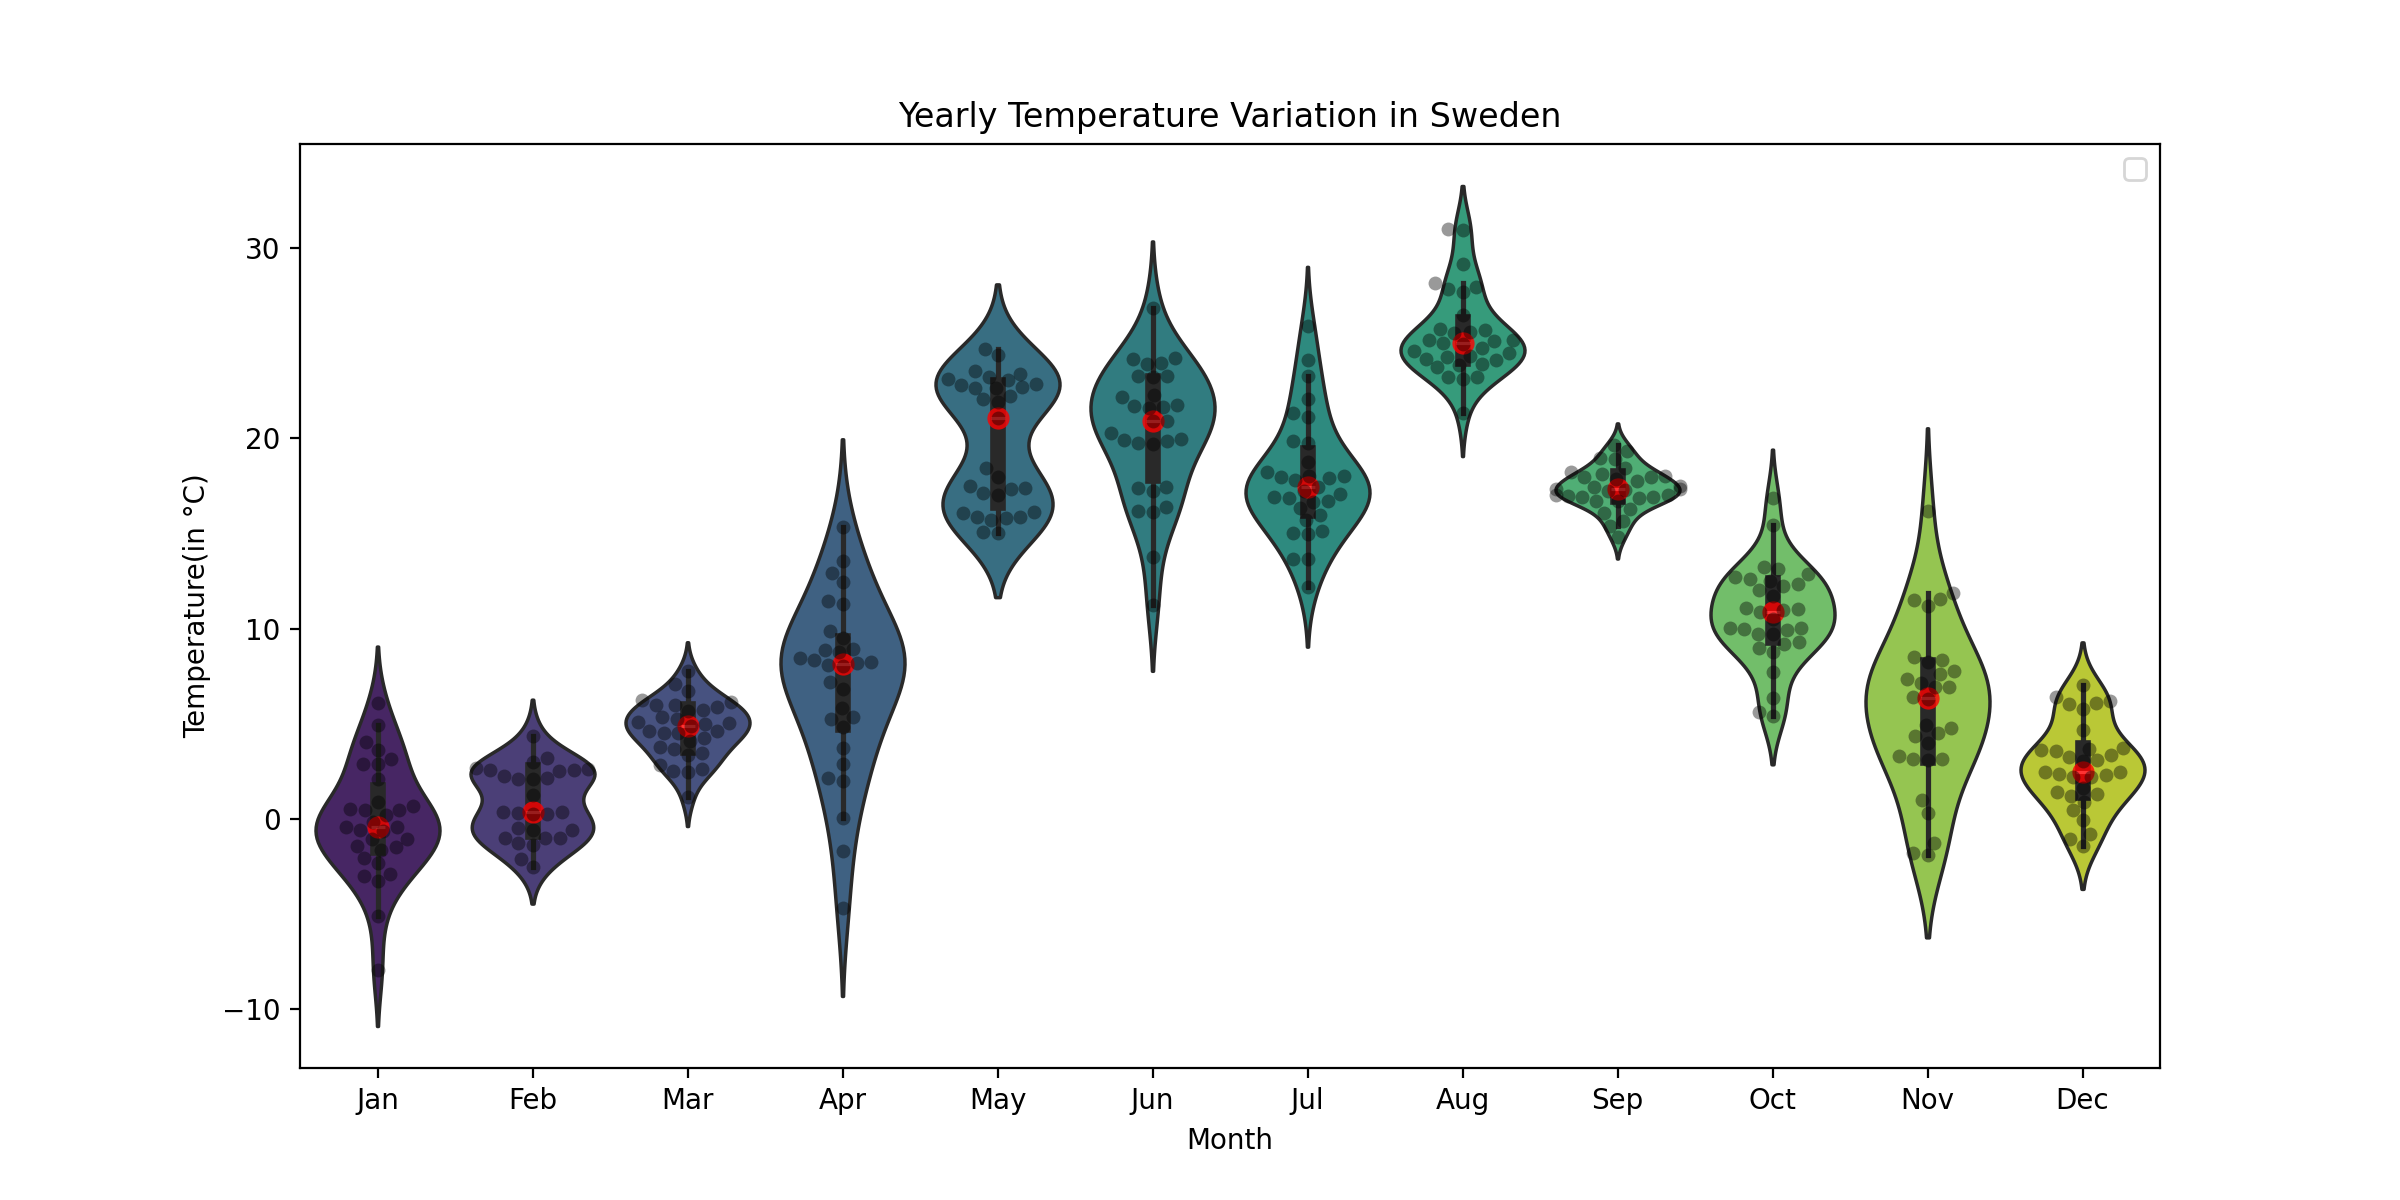

In [98]:

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

median_temperatures = temp.groupby('month')['temp'].median().reindex(month_order).reset_index()


plt.figure(figsize=(12, 6))
sns.violinplot(x='month', y='temp', data=temp, order=month_order, palette='viridis')


sns.stripplot(x='month', y='temp', data=median_temperatures, order=month_order, color='red', size=8, alpha=0.8)


sns.swarmplot(x='month', y='temp', data=temp, order=month_order, color='black', size=5, alpha=0.4)


plt.xlabel('Month')
plt.ylabel('Temperature(in °C)')
plt.title('Yearly Temperature Variation in Sweden')
plt.legend(loc='upper right')
plt.show()


From the violin plot ,temperature in May is bimodal,the distribution of temperature is either gathered above or below the median temperature.Since may is the time wher spring ends and summer begins so some days(end of May probably) we have higher temperature and some days(Beginning of May probably) have lower temorature.Temprature varies from 12 degree celsius to 22 degree celsius during the month May.

## Question 6 (1 point)

A colleague of mine suggested that apartment prices in Sweden increase when the Riksbank have a lower prime rate. Using the dataset on Canvas create a visual which clearly shows the relationship between apartment prices and Sweden's prime rate over time.

In [89]:


rent=pd.read_csv('Rent_house_price.csv')
years = [1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
apartment_prices = [4997, 5896, 6633, 7777, 8314, 9436, 9818, 10938, 12421, 15293, 18653, 20632, 19536, 20709, 22795, 23142, 24351, 27119, 29998, 34637, 37766, 39060, 38895, 38221]
prime_rate = [6.2648, 4.1080, 4.1358, 3.0343, 3.7092, 3.9800, 4.0750, 3.1476, 2.1591, 1.7312, 2.2052, 3.4590, 4.1429, 0.6534, 0.5059, 1.7599, 1.4560, 0.9940, 0.4629, -0.2526, -0.4816, -0.5000, -0.5000, -0.2550]


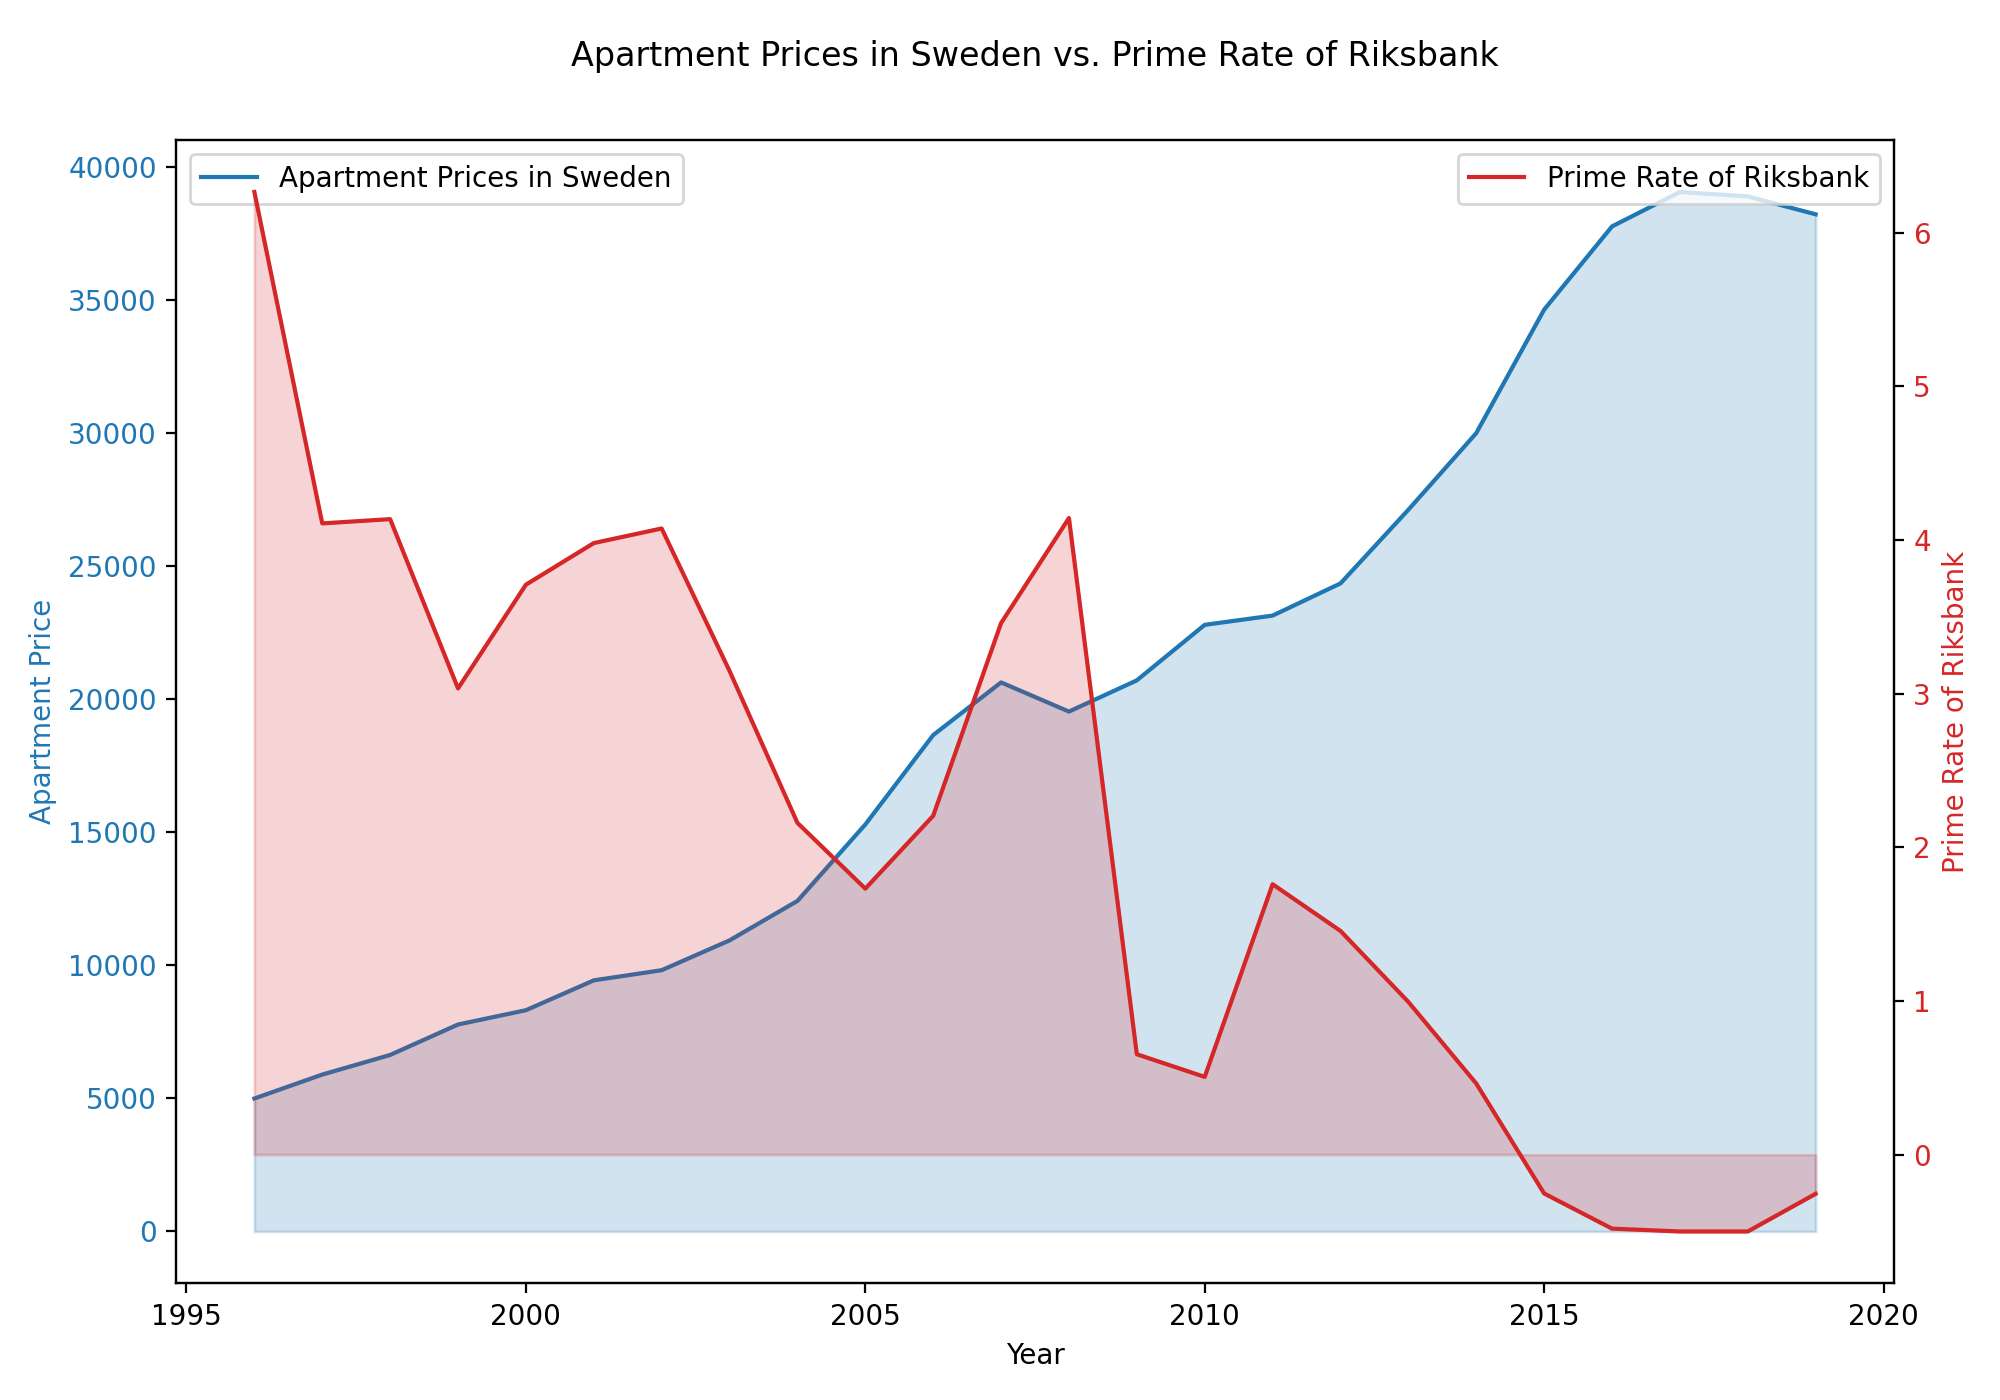

In [92]:


fig, ax1 = plt.subplots(figsize=(10, 7))

ax1.set_xlabel('Year')
ax1.set_ylabel('Apartment Price', color='tab:blue')
sns.lineplot(x=years, y=apartment_prices, ax=ax1, color='tab:blue', label='Apartment Prices in Sweden')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('Prime Rate of Riksbank', color='tab:red')  
sns.lineplot(x=years, y=prime_rate, ax=ax2, color='tab:red', label='Prime Rate of Riksbank')
ax2.tick_params(axis='y', labelcolor='tab:red')

ax1.fill_between(years, apartment_prices, color='tab:blue', alpha=0.2)
ax2.fill_between(years, prime_rate, color='tab:red', alpha=0.2)

fig.tight_layout()  


plt.subplots_adjust(top=0.9)  

plt.title('Apartment Prices in Sweden vs. Prime Rate of Riksbank', y=1.05)  
plt.show()


From the visualization it is ver evident that in Sweden as prime rate of Riksbank increases Apartment prices decreases 

## Question 7 (2 points)

On Canvas, you can find a dataset with inflation adjusted GDP per capita for several countries between 1920 and 2010. Using this dataset answer the following **two** questions: 
1. Select one question you want to investigate with a visual and create that visual using data from at least two years and two countries (1p). 
2. Motivate why your choice if visual is suitable to investigate your question (1p). 

Analyse the trend in GDP per capita in 6 different countries throught the years 1920 to 2010 and make meaningful inference 

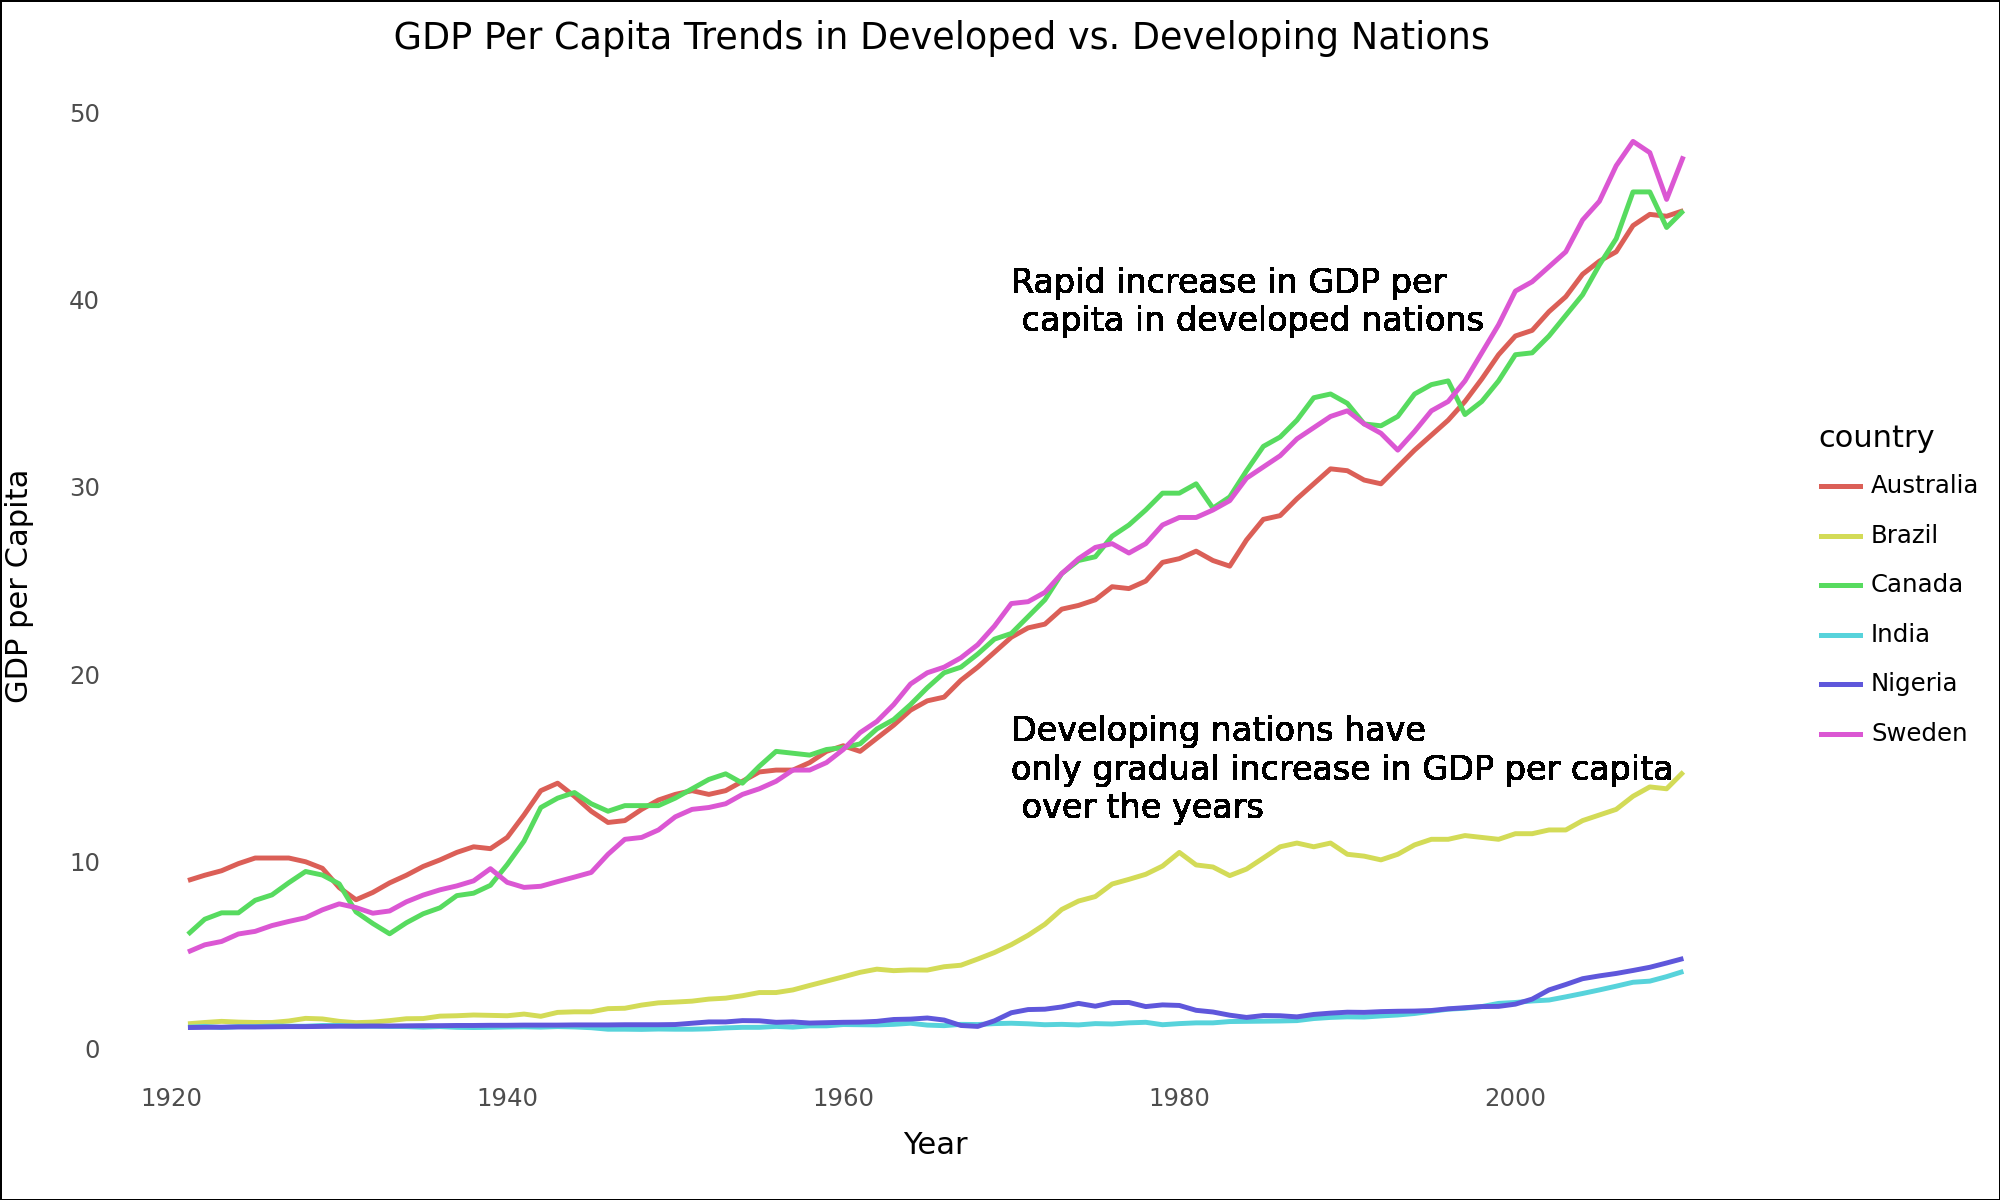

In [96]:

from plotnine import ggplot, aes, geom_text, geom_segment, geom_line, scale_y_continuous, labs, theme_minimal, theme, element_rect, element_text



gdp = pd.read_csv('Data_gdp_per_capita.csv')
filtered_data = gdp[gdp['country'].isin(['Sweden', 'India', 'Nigeria', 'Brazil', 'Canada', 'Australia'])]
filtered_data = filtered_data.reset_index(drop=True)

plot = (
    ggplot(filtered_data, aes(x='Year', y='GDP_per_capita', color='country')) +
    geom_text(x=1970, y=15000, ha="left", color="black", label="Developing nations have\nonly gradual increase in GDP per capita\n over the years", size=12) +
    geom_text(x=1970, y=40000, ha="left", color="black", label="Rapid increase in GDP per \n capita in developed nations", size=12) +
  
    geom_line(size=1.0) +
    scale_y_continuous(breaks=[-5000, 0, 10000, 20000, 30000, 40000, 50000], labels=[-5, 0, 10, 20, 30, 40, 50]) +
    labs(title=' GDP Per Capita Trends in Developed vs. Developing Nations', x='Year', y='GDP per Capita') +
    theme_minimal() +
    theme(
        panel_grid_major_x=element_blank(),
        panel_grid_minor_x=element_blank(),
        panel_grid_major_y=element_blank(),
        panel_grid_minor_y=element_blank(),
        plot_background=element_rect(fill='white', alpha=1),
        title=element_text(hjust=0.5)
    )
)


figure_size = (10, 6)
plot = plot + theme(figure_size=figure_size)

print(plot)


To analyse the change in GDP per capita in 6 different countries I randomly chose 1 country from each continent and plot a line graph to know the variations .Each linerepresent each country and I used distinct colors for each line.The trend can be clearly visualized by this particular plot.After the visualiztion I came to the conclusion that for developed countries(canada,sweden,australia)gdp per capita is rapidly increased over years but for developing countries(india,Nigeria and Brazil )it is a slow process and very low than developed countries.I have used text note to make the inference clear in visualizaion so that all kind of audience get the concept well.Also the trend is very cleat with line graph and title makes the audience to look at the relevant point 


## Question 8 (3 points)

On Canvas I have uploaded a dataset on the number of Olympic medals in the Winter-Olympics from 1964 to 2014 for the countries that hosted the Olympics from 1988 to 2014. Once noticeable feature is that if a country is hosting the Olympics, it tends to win more medals the year it hosts compared to previous year. Here, choose one of the countries and answer the following two questions:

1. Create an **accessible** visual that allows the reader to understand why the medal trend looks like it does (2p). 
    * **Tip** - consider the lessons from the storytelling with data lecture, for example, remember to use an efficient title.
2. Provide a motivation to why the visual is accessible (1p).

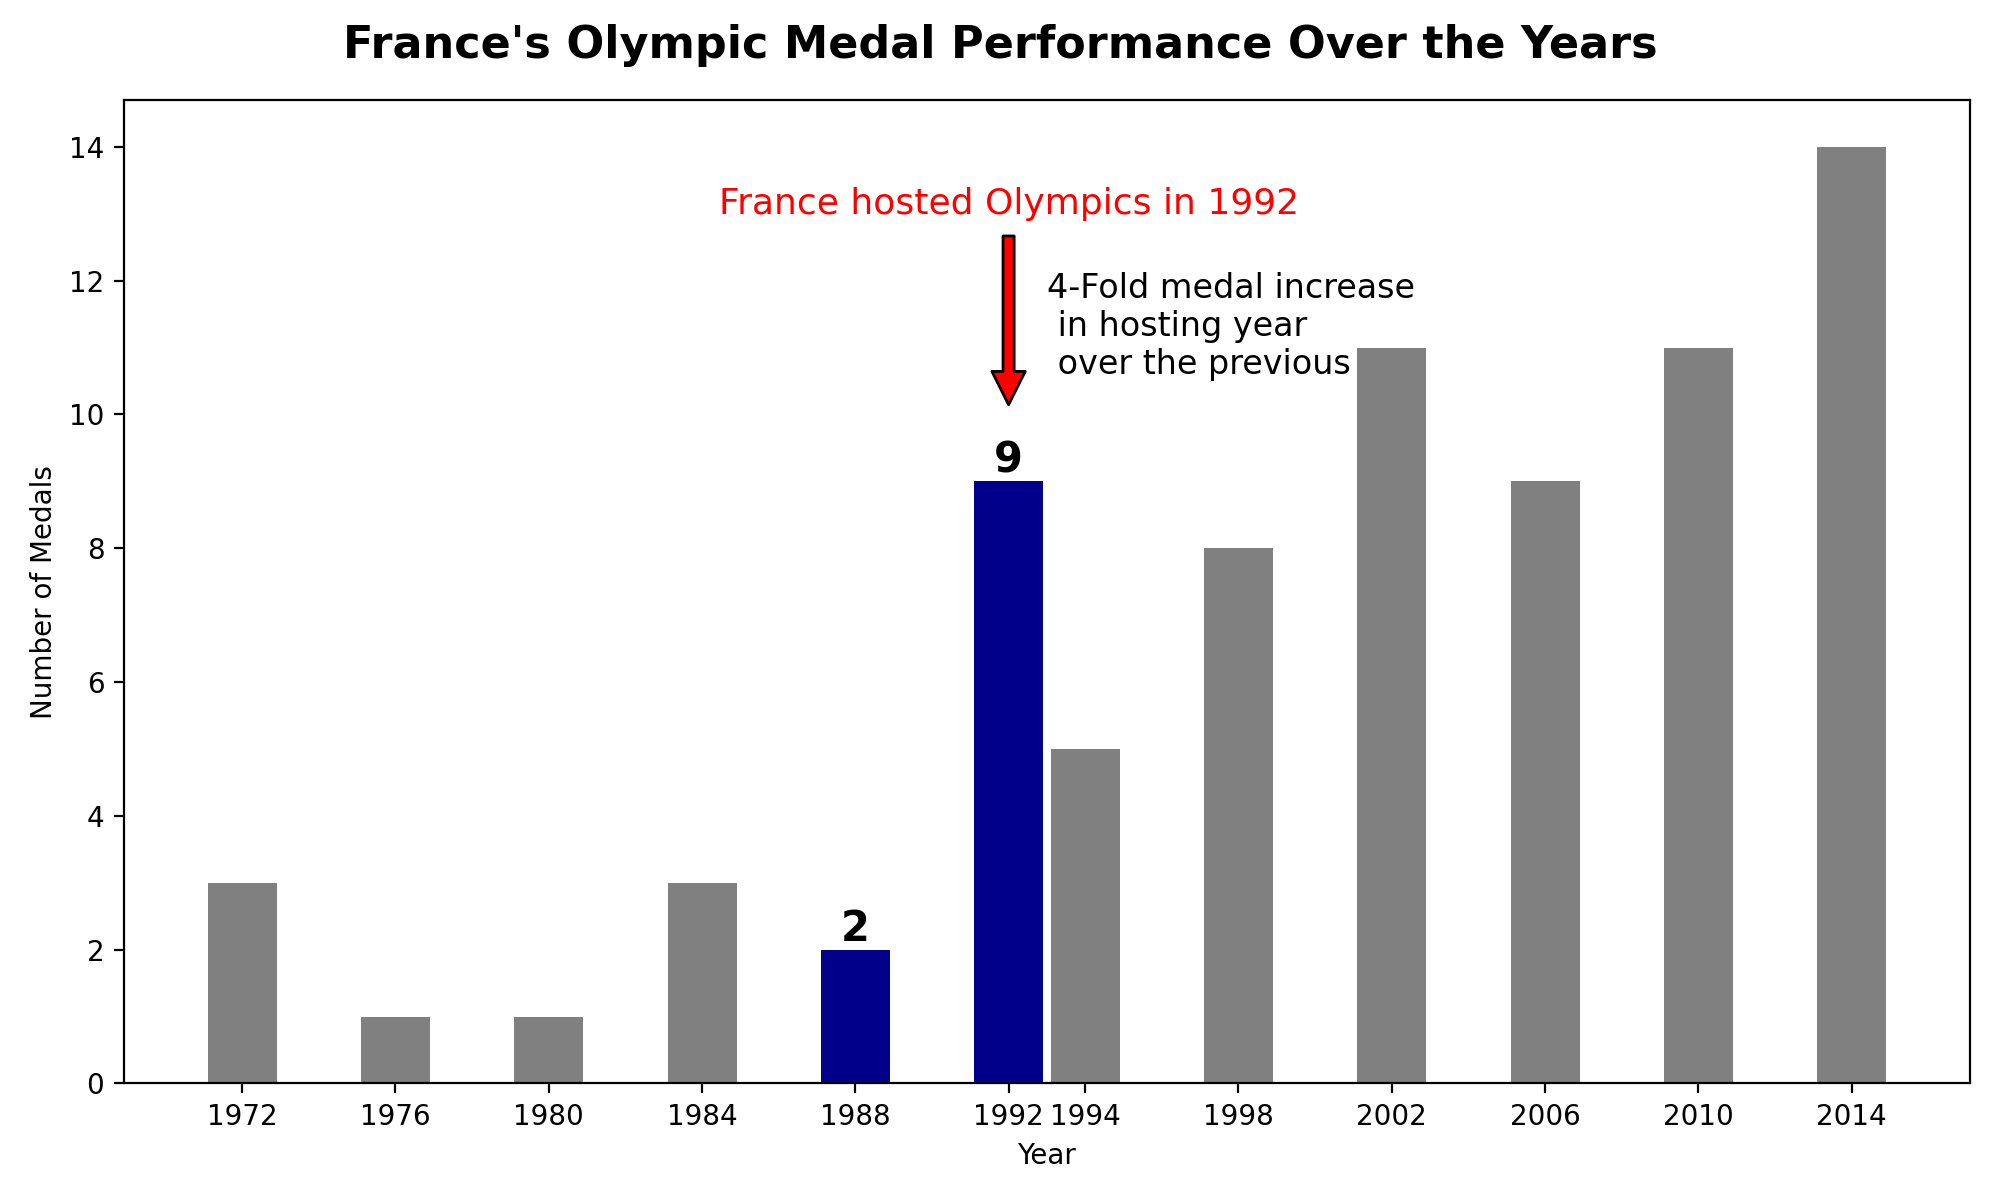

In [75]:




years = [1972, 1976, 1980, 1984, 1988, 1992, 1994, 1998, 2002, 2006, 2010, 2014]
n_medals = [3, 1, 1, 3, 2, 9, 5, 8, 11, 9, 11, 14]

plt.figure(figsize=(10, 6))
bar_width = 1.8


bars = plt.bar(years, n_medals, color=['darkblue' if year == 1988 else 'darkblue' if year == 1992 else 'gray' for year in years], width=bar_width)

plt.suptitle('France\'s Olympic Medal Performance Over the Years', fontsize=16, fontweight='bold')


plt.xlabel('Year', rotation=0)
plt.ylabel('Number of Medals')
plt.xticks(years, rotation=0)
plt.grid(axis='y', linestyle='', alpha=0.7)

plt.annotate('France hosted Olympics in 1992', xy=(1992, 10), xytext=(1992, 13),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=13, color='red', ha='center')

plt.text(1988, 2, '2', ha='center', va='bottom', color='black', fontsize=15, fontweight='bold')
plt.text(1992, 9, '9', ha='center', va='bottom', color='black', fontsize=15, fontweight='bold')


plt.text(1993, 10.5, '4-Fold medal increase \n in hosting year\n over the previous', ha='left', va='bottom', color='black', fontsize=12, fontweight='normal')

plt.tight_layout() 
plt.show()


The above visualization  shows how many Winter Olympic medals France won each year from 1972 to 2014. The bars represent the number of medals, and we can see how the count changed over time. The red arrow and note highlights the year 1992 when France hosted the Olympics.The numbers '2' and '9' above bars 1988 and 1992  point out number of medals won in the year they hosted the event and the previous year . In 1988, France won 2 medals and in 1992, when they hosted the Olympics, they won 9 medals which four times more. This visual helps us quickly see how hosting the Olympics had a big impact on France's medal count.At a first glance from the title and text annotated in plot, it is clear to audience to look at hosted year than any other years.I used red for highlighting text which is apt color for highlighting the point.